In [93]:
%matplotlib inline

In [94]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.affinity import affine_transform
from shapely.geometry import mapping

#do dziedziczenie azymutu eik
from shapely.geometry import Point, LineString
from shapely.ops import nearest_points
from shapely.geometry import Point



In [95]:
# Replace 'path/to/your_geojson' with the actual path to your geojson

geojson_net_path = '24-04-24_template_geo2scheme_geojson_NET-ELEMENTS-input_Tarnowo-Pom.geojson'
geojson_fie_path = '24-04-24_template_geo2scheme_geojson_FIE-input_Tarnowo-Pom.geojson'
geojson_rl_path = '24-04-30_1415_LK-403-converted.geojson'
geojson_st_path = '24-04-29_geo2scheme_LK-403-posterunki.geojson'

# Siedlce OSM: '2024-01-24_siedlce_2180.geojson'
# Siedlce ELEMENTY SIECIOWE: '2024-01-24_elem-siec_isa.geojson'
# Siedlce EIK: '2024-01-31_siedlce_EIK_2180.geojson'
# Warka OSM: '2024-01-31_warka_osm_2180.geojson'
# '2024-01-31_warka_osm_2180.geojson'
#Skierniewice: '2024-02-01_skierniewice_2180_osm.geojson'

#24-04

#24-04-24_template_geo2scheme_geojson_NET-ELEMENTS-input_Tarnowo-Pom.geojson
#24-04-24_template_geo2scheme_geojson_FIE-input_Tarnowo-Pom.geojson


In [96]:
# Read geojson files
gdf_net_geo = gpd.read_file(geojson_net_path)

gdf_fie_geo = gpd.read_file(geojson_fie_path)

gdf_rl = gpd.read_file(geojson_rl_path)

gdf_st = gpd.read_file(geojson_st_path)

In [97]:
# Extract non-spatial properties
non_spatial_properties = gdf_net_geo.drop(columns='geometry')
non_spatial_properties_fie = gdf_fie_geo.drop(columns='geometry')

In [98]:
print(gdf_net_geo.head())
print(gdf_fie_geo.head())
print(gdf_rl.head())
print(gdf_st.head())


    id ID_1                                           geometry
0  NaN    2  MULTILINESTRING ((258326.826 610651.661, 25811...
1  NaN    4  MULTILINESTRING ((258077.418 610706.306, 25805...
2  NaN    6  MULTILINESTRING ((257518.416 610840.380, 25748...
3  3.0    3  MULTILINESTRING ((258112.685 610702.554, 25807...
4  NaN    6  MULTILINESTRING ((257534.323 610835.472, 25751...
   fid    Id  Direction                       geometry
0  1.0  None          0  POINT (257195.392 610960.066)
1  2.0  None          2  POINT (257208.422 610955.122)
2  3.0  None          2  POINT (257476.443 610852.502)
3  4.0  None          2  POINT (257524.708 610843.428)
4  5.0  None          1  POINT (257568.663 610829.814)
  osm_id  code fclass  name layer bridge tunnel  voiv  path  \
0   None  None   None  None  None   None   None  None  None   

                                            geometry  
0  LINESTRING (346412.904 588543.402, 346412.902 ...  
   fid               name                       geometr

In [99]:
print(gdf_rl.head())

  osm_id  code fclass  name layer bridge tunnel  voiv  path  \
0   None  None   None  None  None   None   None  None  None   

                                            geometry  
0  LINESTRING (346412.904 588543.402, 346412.902 ...  


<Axes: >

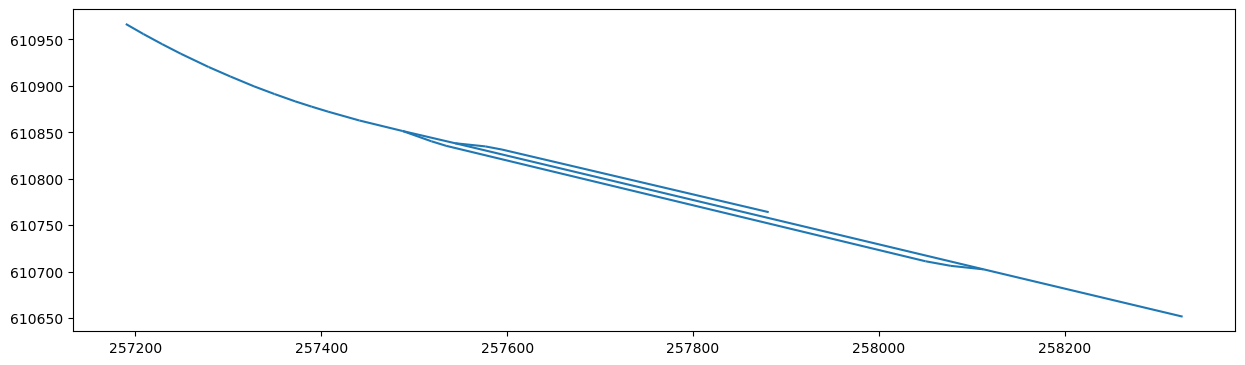

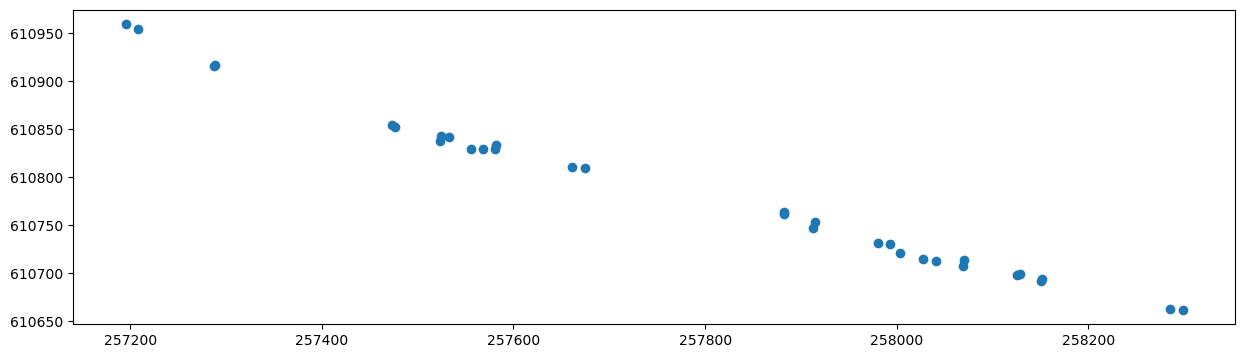

In [100]:
# Visualize the data
gdf_net_geo.plot(figsize=(15, 15))
gdf_fie_geo.plot(figsize=(15, 15))

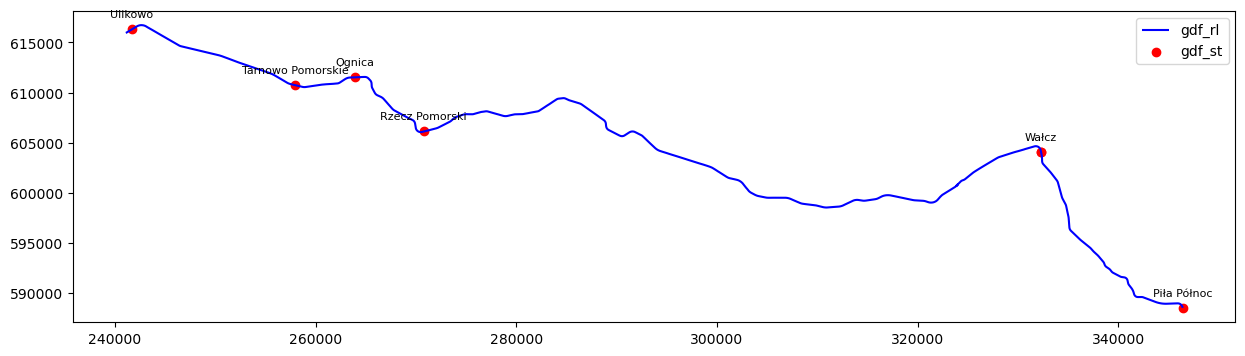

In [101]:
# Plotting both GeoDataFrames on the same plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plotting gdf_rl first
gdf_rl.plot(ax=ax, color='blue', label='gdf_rl')

# Plotting gdf_st next so it appears above gdf_rl
gdf_st.plot(ax=ax, color='red', label='gdf_st')

# Adding labels for 'name' field of gdf_st with an offset on y-axis
label_offset = 1000  # Adjust as needed for the desired spacing
for x, y, label in zip(gdf_st.geometry.centroid.x, gdf_st.geometry.centroid.y, gdf_st['name']):
    ax.text(x, y + label_offset, label, fontsize=8, ha='center', va='bottom', zorder=5)

# Adding legend
ax.legend()

# Display the plot
plt.show()


In [102]:
area_azimuth= 166.5
rotate_angle = area_azimuth * -1

#Siedlce: 38
#Tarnowo Pomorskie -166.5

In [103]:
df_rotated2_net = gdf_net_geo.rotate(rotate_angle, origin=gdf_net_geo.unary_union.centroid)
df_rotated2_fie = gdf_fie_geo.rotate(rotate_angle, origin=gdf_net_geo.unary_union.centroid)

<Axes: >

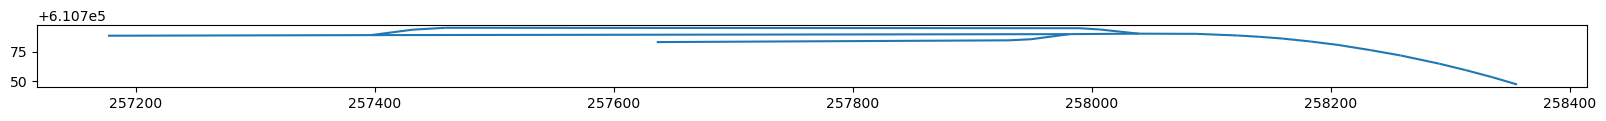

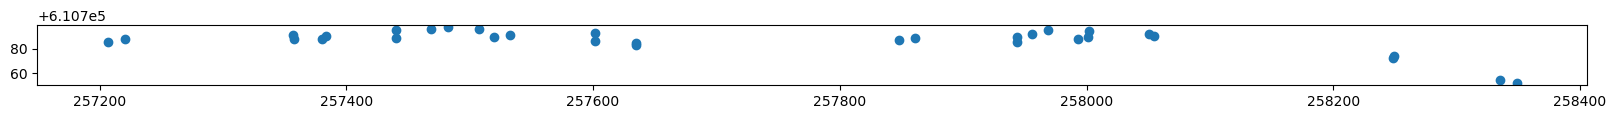

In [104]:
df_rotated2_net.plot(figsize=(20, 20))
df_rotated2_fie.plot(figsize=(20, 20))

In [105]:
# Save the GeoDataFrames as a GeoJSON files
df_rotated2_net.to_file('temp_net.geojson', driver='GeoJSON')
df_rotated2_fie.to_file('temp_fie.geojson', driver='GeoJSON')
#Paths
geojson_path2_net = 'temp_net.geojson'
geojson_path2_fie = 'temp_fie.geojson'
#Read geojson files
gdf_net_rotated_translated = gpd.read_file(geojson_path2_net)
gdf_fie_rotated_translated = gpd.read_file(geojson_path2_fie)

In [106]:
# Oblicz minimalne współrzędne (xmin, ymin) dla każdego z geometrii
min_coords = gdf_net_rotated_translated.bounds.min()

In [107]:
#gdf_net_rotated_translated = gdf_net_rotated.copy()
#gdf_fie_rotated_translated = gdf_net_rotated.copy()
# Przesuń wszystkie geometrie w lewo i w dół o wartości minimalnych współrzędnych
gdf_net_rotated_translated['geometry'] = gdf_net_rotated_translated.translate(xoff=-min_coords['minx'], yoff=-min_coords['miny'])
gdf_fie_rotated_translated['geometry'] = gdf_fie_rotated_translated.translate(xoff=-min_coords['minx'], yoff=-min_coords['miny'])

In [108]:
# Merge non-spatial properties back into the modified GeoDataFrame
gdf_net_rotated_translated = gpd.GeoDataFrame(non_spatial_properties, geometry=gdf_net_rotated_translated['geometry'])
gdf_fie_rotated_translated = gpd.GeoDataFrame(non_spatial_properties_fie, geometry=gdf_fie_rotated_translated['geometry'])

In [109]:
print(gdf_net_rotated_translated.head())
print(gdf_fie_rotated_translated.head())

    id ID_1                                           geometry
0  NaN    2   MULTILINESTRING ((0.000 40.781, 220.105 41.284))
1  NaN    4  MULTILINESTRING ((255.274 45.868, 282.790 47.4...
2  NaN    6  MULTILINESTRING ((830.129 45.996, 862.695 42.4...
3  3.0    3  MULTILINESTRING ((220.105 41.284, 255.274 45.8...
4  NaN    6  MULTILINESTRING ((813.516 47.055, 830.129 45.9...
   fid    Id  Direction                geometry
0  1.0  None          0  POINT (1172.169 5.025)
1  2.0  None          2  POINT (1158.344 6.791)
2  3.0  None          2  POINT (873.773 44.007)
3  4.0  None          2  POINT (824.722 41.563)
4  5.0  None          1  POINT (778.804 44.540)


<Axes: >

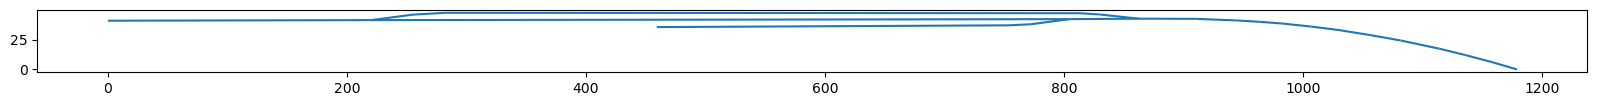

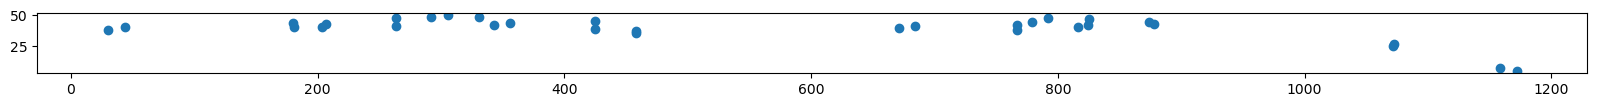

In [110]:
gdf_net_rotated_translated.plot(figsize=(20, 20))
gdf_fie_rotated_translated.plot(figsize=(20, 20))

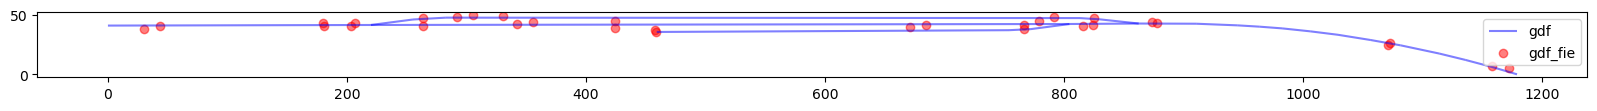

In [111]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the first GeoDataFrame on the specified axis
gdf_net_rotated_translated.plot(ax=ax, color='blue', alpha=0.5, label='gdf')

# Plot the second GeoDataFrame on the same axis
gdf_fie_rotated_translated.plot(ax=ax, color='red', alpha=0.5, label='gdf_fie')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [112]:
# Function to scale the x-coordinates by a factor
def scale_x(geometry, factor):
    return affine_transform(geometry, [factor, 0, 0, 1, 0, 0])

# Apply the scaling operation to the geometry column
gdf_net_rotated_translated['geometry'] = gdf_net_rotated_translated['geometry'].apply(scale_x, factor=1/4)
gdf_fie_rotated_translated['geometry'] = gdf_fie_rotated_translated['geometry'].apply(scale_x, factor=1/4)

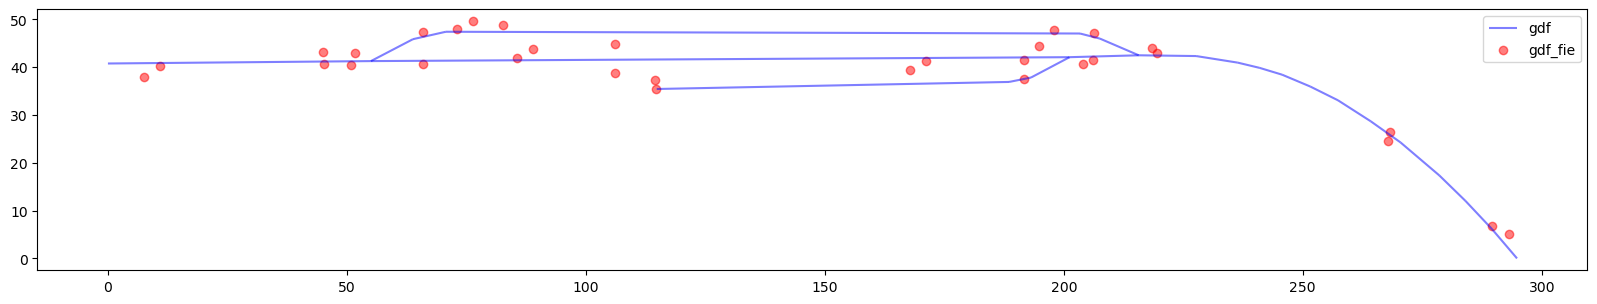

In [113]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the first GeoDataFrame on the specified axis
gdf_net_rotated_translated.plot(ax=ax, color='blue', alpha=0.5, label='gdf')

# Plot the second GeoDataFrame on the same axis
gdf_fie_rotated_translated.plot(ax=ax, color='red', alpha=0.5, label='gdf_fie')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [114]:
# Function to scale both x and y coordinates by a factor with origin at (0,0)
def scale_xy(geometry, factor):
    # Apply scaling transformation with origin at (0,0)
    return affine_transform(geometry, [factor, 0, 0, factor, 0, 0])

# Apply the scaling operation to the geometry column
gdf_net_rotated_translated['geometry'] = gdf_net_rotated_translated['geometry'].apply(scale_xy, factor=18.75)
gdf_fie_rotated_translated['geometry'] = gdf_fie_rotated_translated['geometry'].apply(scale_xy, factor=18.75)


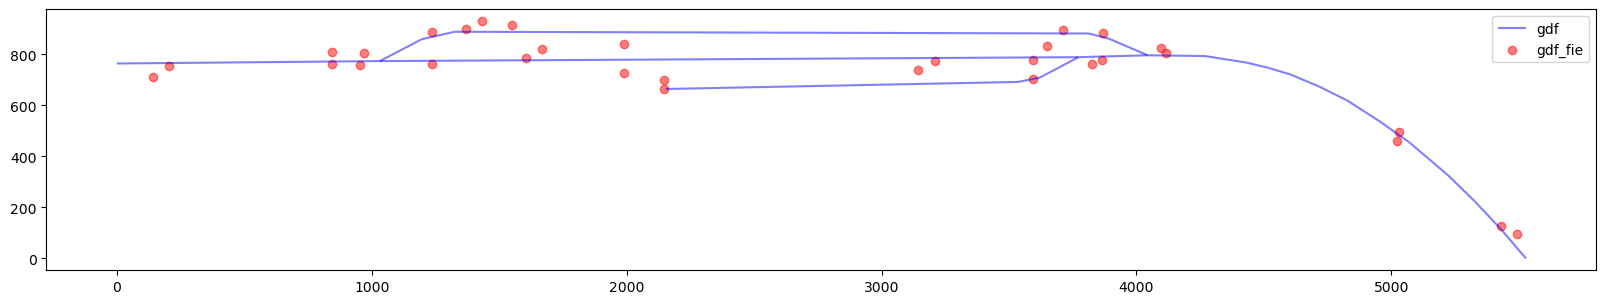

In [115]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the first GeoDataFrame on the specified axis
gdf_net_rotated_translated.plot(ax=ax, color='blue', alpha=0.5, label='gdf')

# Plot the second GeoDataFrame on the same axis
gdf_fie_rotated_translated.plot(ax=ax, color='red', alpha=0.5, label='gdf_fie')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [116]:
# Define a function to calculate azimuth with values adjusted to follow the convention
def calculate_azimuth(geometry):
    start_point = geometry.interpolate(0)
    end_point = geometry.interpolate(1)
    dx = end_point.x - start_point.x
    dy = end_point.y - start_point.y
    azimuth = np.arctan2(dy, dx) * 180 / np.pi
    azimuth = (90 - azimuth) % 360  # Adjust azimuth to follow convention
    return azimuth

# Calculate azimuth for gdf_net and add it as a new column
gdf_net_rotated_translated['net_azimuth'] = gdf_net_rotated_translated['geometry'].apply(calculate_azimuth)

# Print the first few rows of the modified GeoDataFrames
print("Modified gdf_net:")
print(gdf_net_rotated_translated.head())




Modified gdf_net:
    id ID_1                                           geometry  net_azimuth
0  NaN    2  MULTILINESTRING ((0.000 764.648, 1031.742 774....    89.476568
1  NaN    4  MULTILINESTRING ((1196.596 860.033, 1325.578 8...    77.270278
2  NaN    6  MULTILINESTRING ((3891.230 862.425, 4043.883 7...   113.248573
3  3.0    3  MULTILINESTRING ((1031.742 774.074, 1196.596 8...    62.461107
4  NaN    6  MULTILINESTRING ((3813.358 882.282, 3891.230 8...   104.305465


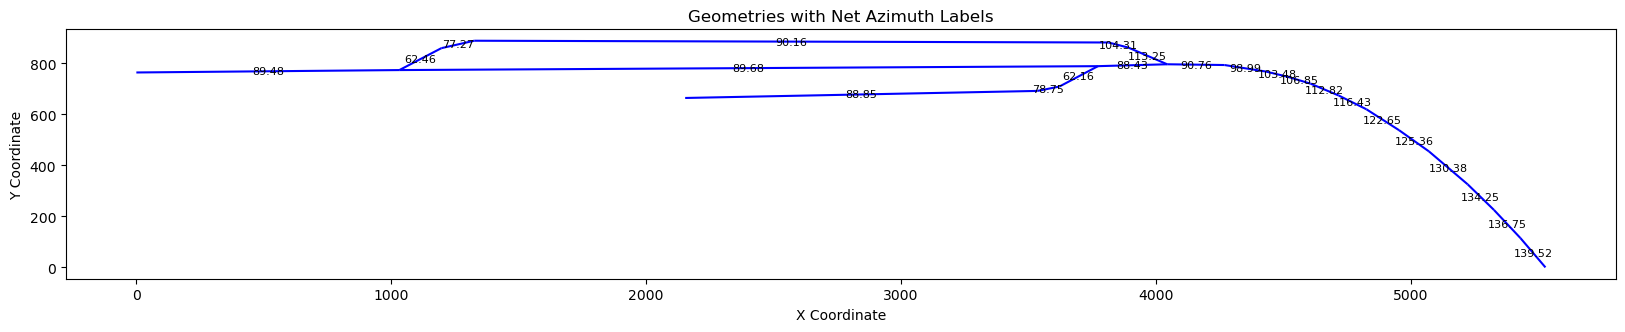

In [117]:
# Plot the geometries
fig, ax = plt.subplots(figsize=(20, 20))
gdf_net_rotated_translated.plot(ax=ax, color='blue')

# Add labels for net_azimuth
for idx, row in gdf_net_rotated_translated.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, f"{row['net_azimuth']:.2f}", fontsize=8, ha='center', va='center')

# Set plot title and labels
ax.set_title('Geometries with Net Azimuth Labels')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Show plot
plt.show()



In [118]:
# Define a function to find nearest gdf_net element and inherit azimuth
def inherit_azimuth(row):
    nearest_geom = nearest_points(row.geometry, gdf_net_rotated_translated.unary_union)
    if nearest_geom[1].is_empty:
        return None
    else:
        nearest_line = gdf_net_rotated_translated.distance(nearest_geom[1]).idxmin()
        nearest_net = gdf_net_rotated_translated.loc[nearest_line]
        return nearest_net['net_azimuth']

# Apply the function to calculate and inherit azimuth for gdf_fie
gdf_fie_rotated_translated['azimuth_inherit'] = gdf_fie_rotated_translated.apply(inherit_azimuth, axis=1)

# Print the resulting dataframe without the debug prints
print("\nModified gdf_fie:")
print(gdf_fie_rotated_translated.head())



Modified gdf_fie:
   fid    Id  Direction                  geometry  azimuth_inherit
0  1.0  None          0   POINT (5494.540 94.224)       139.520274
1  2.0  None          2  POINT (5429.737 127.332)       136.745537
2  3.0  None          2  POINT (4095.811 825.132)        90.761343
3  4.0  None          2  POINT (3865.886 779.315)        88.431892
4  5.0  None          1  POINT (3650.644 835.127)        89.679313


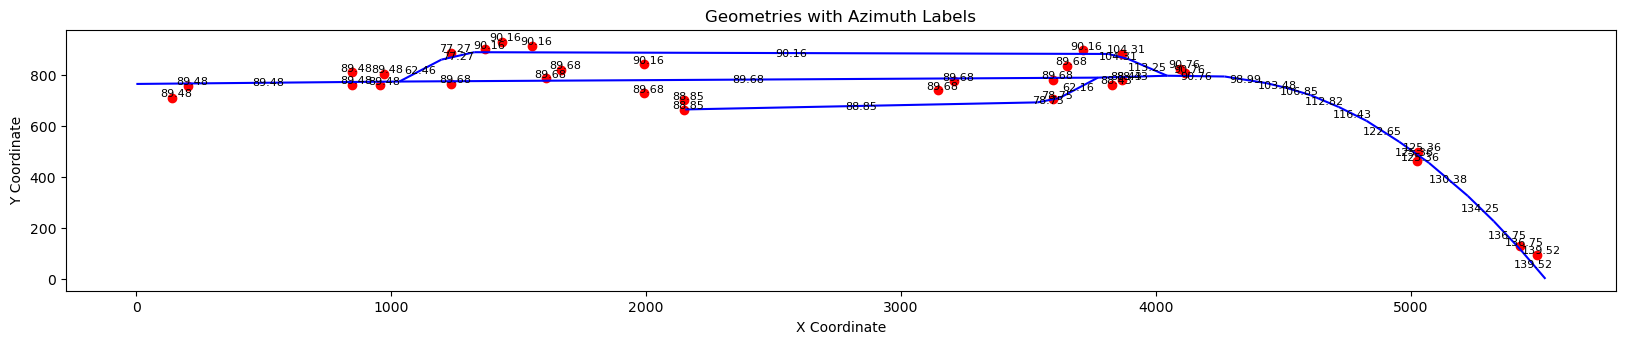

In [119]:
# Plot the geometries
fig, ax = plt.subplots(figsize=(20, 20))

# Plot gdf_net
gdf_net_rotated_translated.plot(ax=ax, color='blue')

# Plot gdf_fie
gdf_fie_rotated_translated.plot(ax=ax, color='red')

# Add labels for net_azimuth
for idx, row in gdf_net_rotated_translated.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, f"{row['net_azimuth']:.2f}", fontsize=8, ha='center', va='center')

# Add labels for azimuth_inherit with spacing
for idx, row in gdf_fie_rotated_translated.iterrows():
    label = f"{row['azimuth_inherit']:.2f}"
    ax.annotate(label, (row.geometry.x, row.geometry.y), xytext=(3, 3), textcoords='offset points', fontsize=8, ha='center', va='center')

# Set plot title and labels
ax.set_title('Geometries with Azimuth Labels')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Show plot
plt.show()


In [120]:
print(gdf_net_rotated_translated.head())
print(gdf_fie_rotated_translated.head())

    id ID_1                                           geometry  net_azimuth
0  NaN    2  MULTILINESTRING ((0.000 764.648, 1031.742 774....    89.476568
1  NaN    4  MULTILINESTRING ((1196.596 860.033, 1325.578 8...    77.270278
2  NaN    6  MULTILINESTRING ((3891.230 862.425, 4043.883 7...   113.248573
3  3.0    3  MULTILINESTRING ((1031.742 774.074, 1196.596 8...    62.461107
4  NaN    6  MULTILINESTRING ((3813.358 882.282, 3891.230 8...   104.305465
   fid    Id  Direction                  geometry  azimuth_inherit
0  1.0  None          0   POINT (5494.540 94.224)       139.520274
1  2.0  None          2  POINT (5429.737 127.332)       136.745537
2  3.0  None          2  POINT (4095.811 825.132)        90.761343
3  4.0  None          2  POINT (3865.886 779.315)        88.431892
4  5.0  None          1  POINT (3650.644 835.127)        89.679313


In [121]:
# Define a function to calculate the target azimuth
def calculate_target_azimuth(row):
    if row['Direction'] == 0:
        return row['azimuth_inherit'] + 180
    else:
        return row['azimuth_inherit']

# Apply the function to create the 'target_azimuth' field
gdf_fie_rotated_translated['target_azimuth'] = gdf_fie_rotated_translated.apply(calculate_target_azimuth, axis=1)

# Print the modified DataFrame
print(gdf_fie_rotated_translated.head())


   fid    Id  Direction                  geometry  azimuth_inherit  \
0  1.0  None          0   POINT (5494.540 94.224)       139.520274   
1  2.0  None          2  POINT (5429.737 127.332)       136.745537   
2  3.0  None          2  POINT (4095.811 825.132)        90.761343   
3  4.0  None          2  POINT (3865.886 779.315)        88.431892   
4  5.0  None          1  POINT (3650.644 835.127)        89.679313   

   target_azimuth  
0      319.520274  
1      136.745537  
2       90.761343  
3       88.431892  
4       89.679313  


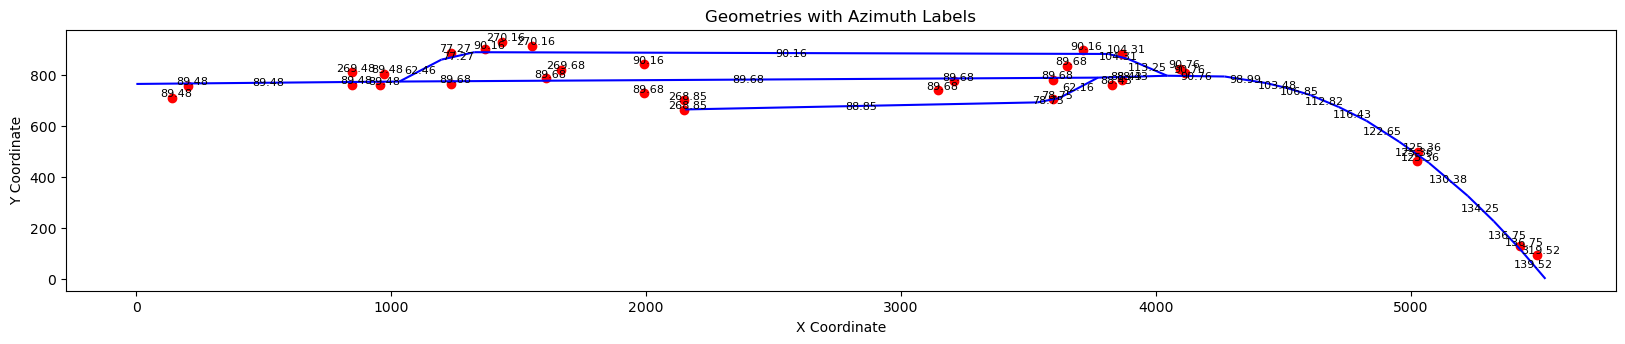

In [122]:
# Plot the geometries
fig, ax = plt.subplots(figsize=(20, 20))

# Plot gdf_net
gdf_net_rotated_translated.plot(ax=ax, color='blue')

# Plot gdf_fie
gdf_fie_rotated_translated.plot(ax=ax, color='red')

# Add labels for net_azimuth
for idx, row in gdf_net_rotated_translated.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, f"{row['net_azimuth']:.2f}", fontsize=8, ha='center', va='center')

# Add labels for target_azimuth
for idx, row in gdf_fie_rotated_translated.iterrows():
    label = f"{row['target_azimuth']:.2f}"  # Use 'target_azimuth' field
    ax.annotate(label, (row.geometry.x, row.geometry.y), xytext=(3, 3), textcoords='offset points', fontsize=8, ha='center', va='center')

# Set plot title and labels
ax.set_title('Geometries with Azimuth Labels')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Show plot
plt.show()


In [123]:
# Save the GeoDataFrame as a GeoJSON file
gdf_net_rotated_translated.to_file('24-04-24_template_geo2scheme_geojson_NET-ELEMENTS-output_Tarnowo-Pom.geojson', driver='GeoJSON')
gdf_fie_rotated_translated.to_file('24-04-24_template_geo2scheme_geojson_FIE-output_Tarnowo-Pom.geojson', driver='GeoJSON')

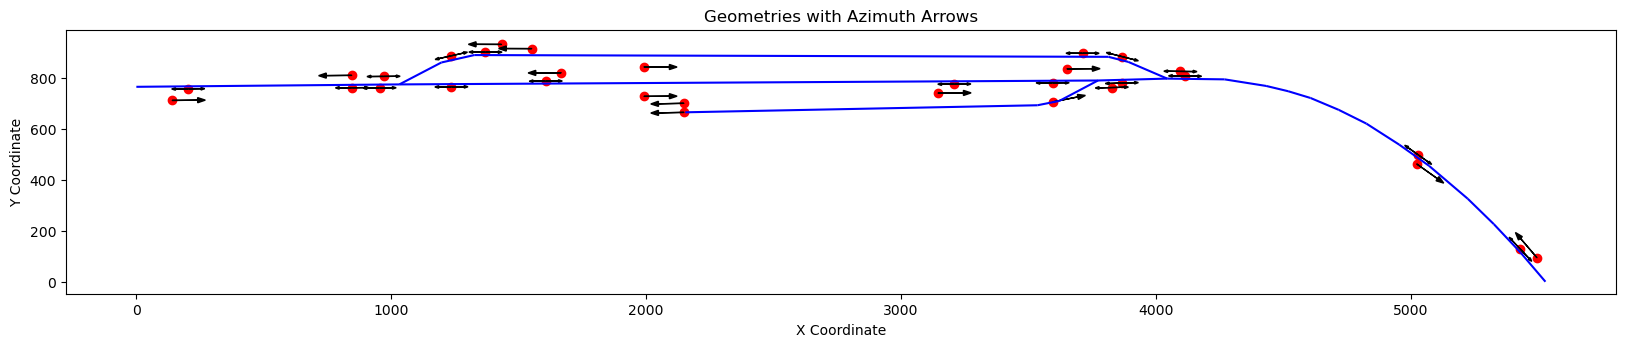

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Plot the geometries
fig, ax = plt.subplots(figsize=(20, 20))

# Plot gdf_net
gdf_net_rotated_translated.plot(ax=ax, color='blue')

# Plot gdf_fie
gdf_fie_rotated_translated.plot(ax=ax, color='red')

# Add labels for net_azimuth
#for idx, row in gdf_net.iterrows():
#    centroid = row.geometry.centroid
#    ax.text(centroid.x, centroid.y, f"{row['net_azimuth']:.2f}", fontsize=8, ha='center', va='center')

# Plot arrows for target_azimuth
for idx, row in gdf_fie_rotated_translated.iterrows():
    azimuth = row['target_azimuth']
    angle_rad = np.deg2rad(90 - azimuth)  # Convert azimuth to radians, and adjust to align with the standard plotting orientation
    arrow_length = 100  # Length of the arrow
    if row['Direction'] == 2:
        arrow_length *= 0.5  # Reduce arrow length for Direction equal to 2
        dx = arrow_length * np.cos(angle_rad)  # X component of arrow
        dy = arrow_length * np.sin(angle_rad)  # Y component of arrow
        ax.arrow(row.geometry.x, row.geometry.y, dx, dy, head_width=10, head_length=15, fc='k', ec='k')  # Plot smaller arrow
        
        # Plot arrow rotated 180 degrees
        dx180 = arrow_length * np.cos(angle_rad + np.pi)  # X component of arrow rotated 180 degrees
        dy180 = arrow_length * np.sin(angle_rad + np.pi)  # Y component of arrow rotated 180 degrees
        ax.arrow(row.geometry.x, row.geometry.y, dx180, dy180, head_width=10, head_length=15, fc='k', ec='k')  # Plot rotated arrow
    else:
        dx = arrow_length * np.cos(angle_rad)  # X component of arrow
        dy = arrow_length * np.sin(angle_rad)  # Y component of arrow
        ax.arrow(row.geometry.x, row.geometry.y, dx, dy, head_width=20, head_length=30, fc='k', ec='k')  # Plot arrow

# Set plot title and labels
ax.set_title('Geometries with Azimuth Arrows')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Show plot
plt.show()


                        geometry  distance_along_line
0  POINT (346412.904 588543.402)                  0.0
1  POINT (345651.315 588982.114)               1000.0
2  POINT (344651.867 588953.093)               2000.0
3  POINT (343675.860 589147.671)               3000.0
4  POINT (342739.341 589498.279)               4000.0


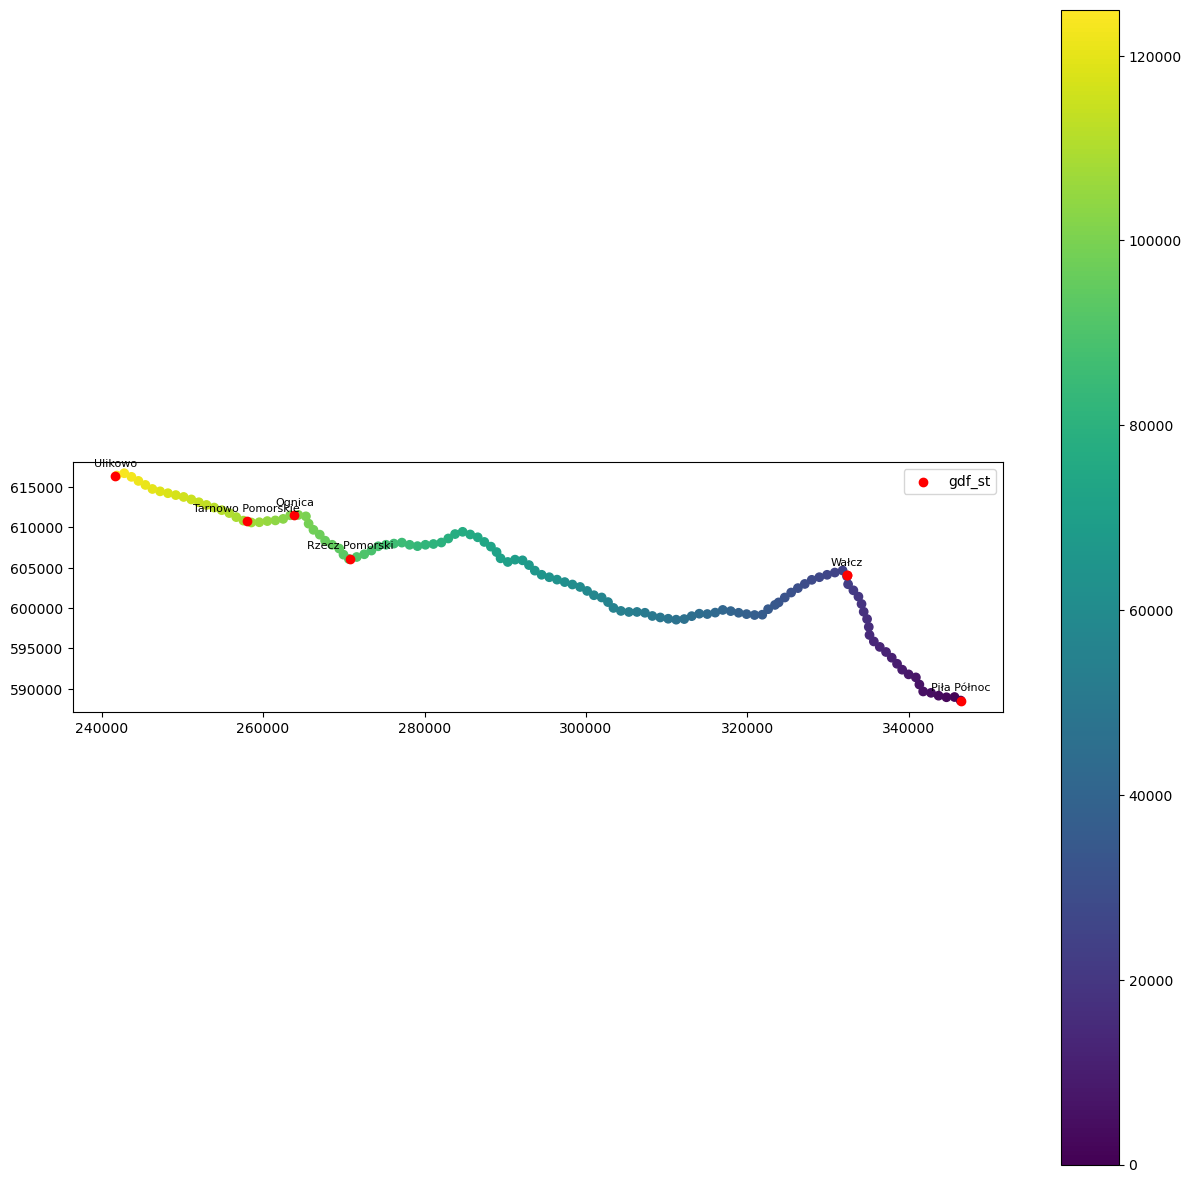

In [125]:
# Extract the geometry (multiline string) from the GeoDataFrame
line_geometry = gdf_rl.geometry.iloc[0]

# Define the interval distance for chainage points (in meters)
interval_distance = 1000 # Adjust as needed

# Create chainage points along the line
chainage_points = []
distance_along_line = 0
while distance_along_line <= line_geometry.length:
    point = line_geometry.interpolate(distance_along_line)
    chainage_points.append(point)
    distance_along_line += interval_distance

# Create a GeoDataFrame for the chainage points
gdf_chainage = gpd.GeoDataFrame(geometry=chainage_points, crs=gdf_rl.crs)

# Add a new column to the GeoDataFrame to store the distance along the line
gdf_chainage['distance_along_line'] = gdf_chainage.apply(lambda row: line_geometry.project(row.geometry), axis=1)

# Save or visualize the GeoDataFrame containing chainage points
print(gdf_chainage.head())
gdf_chainage.to_file('rl-403-chainage-1m.geojson', driver='GeoJSON')
# Plotting both GeoDataFrames on the same plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plotting gdf_rl first
#gdf_rl.plot(ax=ax, color='blue', label='gdf_rl')
gdf_chainage.plot(ax=ax,column='distance_along_line', legend=True)

# Plotting gdf_st next so it appears above gdf_rl
gdf_st.plot(ax=ax, color='red', label='gdf_st')

# Adding labels for 'name' field of gdf_st with an offset on y-axis
label_offset = 1000  # Adjust as needed for the desired spacing
for x, y, label in zip(gdf_st.geometry.centroid.x, gdf_st.geometry.centroid.y, gdf_st['name']):
    ax.text(x, y + label_offset, label, fontsize=8, ha='center', va='bottom', zorder=5)

# Adding legend
ax.legend()

# Display the plot
plt.show()




In [126]:
print(gdf_fie_rotated_translated.head())
print(gdf_fie_geo.head())
print(gdf_chainage.head())

   fid    Id  Direction                  geometry  azimuth_inherit  \
0  1.0  None          0   POINT (5494.540 94.224)       139.520274   
1  2.0  None          2  POINT (5429.737 127.332)       136.745537   
2  3.0  None          2  POINT (4095.811 825.132)        90.761343   
3  4.0  None          2  POINT (3865.886 779.315)        88.431892   
4  5.0  None          1  POINT (3650.644 835.127)        89.679313   

   target_azimuth  
0      319.520274  
1      136.745537  
2       90.761343  
3       88.431892  
4       89.679313  
   fid    Id  Direction                       geometry
0  1.0  None          0  POINT (257195.392 610960.066)
1  2.0  None          2  POINT (257208.422 610955.122)
2  3.0  None          2  POINT (257476.443 610852.502)
3  4.0  None          2  POINT (257524.708 610843.428)
4  5.0  None          1  POINT (257568.663 610829.814)
                        geometry  distance_along_line
0  POINT (346412.904 588543.402)                  0.0
1  POINT (345651.315 

In [127]:
    # Step 1: Create new field named 'km' in gdf_fie_geo
    gdf_fie_geo['km'] = None
    
    # Step 2: Find the nearest feature from gdf_chainage for each point in gdf_fie_geo
    def find_nearest(row, gdf):
        nearest = gdf_chainage['geometry'] == nearest_points(row['geometry'], gdf['geometry'])[1]
        return gdf_chainage[nearest]['distance_along_line'].values[0]
    
    gdf_fie_geo['km'] = gdf_fie_geo.apply(find_nearest, axis=1, args=(gdf_chainage,))
    
    # Step 3: Append the 'km' field to gdf_fie_rotated_translated
    # Merge based on the fid or any other common identifier
    gdf_fie_rotated_translated = gdf_fie_rotated_translated.merge(gdf_fie_geo[['fid', 'km']], on='fid', how='left')
    
    # Display the updated dataframes
    print(gdf_fie_geo.head())
    print(gdf_fie_rotated_translated.head())

   fid    Id  Direction                       geometry   km
0  1.0  None          0  POINT (257195.392 610960.066)  0.0
1  2.0  None          2  POINT (257208.422 610955.122)  0.0
2  3.0  None          2  POINT (257476.443 610852.502)  0.0
3  4.0  None          2  POINT (257524.708 610843.428)  0.0
4  5.0  None          1  POINT (257568.663 610829.814)  0.0
   fid    Id  Direction                  geometry  azimuth_inherit  \
0  1.0  None          0   POINT (5494.540 94.224)       139.520274   
1  2.0  None          2  POINT (5429.737 127.332)       136.745537   
2  3.0  None          2  POINT (4095.811 825.132)        90.761343   
3  4.0  None          2  POINT (3865.886 779.315)        88.431892   
4  5.0  None          1  POINT (3650.644 835.127)        89.679313   

   target_azimuth   km  
0      319.520274  0.0  
1      136.745537  0.0  
2       90.761343  0.0  
3       88.431892  0.0  
4       89.679313  0.0  
